In [1]:
# 1)
print('Welcome to Machine Learning!')

Welcome to Machine Learning!


In [2]:
#2) 
import sys

assert sys.version_info >= (3, 7)

In [3]:
#3)
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# 1.) Download the Data

In [4]:
#4)
# Writing a function that manually downloads and decompresses data
        ## Usually needs to be pulled form a relational DB
        ## A fxn to fetch data can be useful for installing the dataset on multiple machines

from pathlib import Path
import pandas as pd        # Data manip and analysts
import tarfile             # For decompressing a .tgz file (compressed archive)
import urllib.request      # For downloading files from the internet

def load_housing_data() -> pd.DataFrame:
    tarball_path = Path("datasets/housing.tgz")                                     # 1) -  look for "datasets/housing.tgz" file
    if not tarball_path.is_file():                                              
        Path("datasets").mkdir(parents=True, exist_ok=True)                         # 2) - Create the datasets directory in current director (usually /content)
        url: str = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)                               # 3) - Download the housing.tgz file
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")                             # 4) - Extract the contents of the tarball to the datasets directory
    return pd.read_csv(Path("datasets/housing/housing.csv"))                        # 5) - Load the CSV file into a pandas DataFrame

housing: pd.DataFrame = load_housing_data()

In [5]:
#5)
housing.head()  # Pulls top 5 rows from the dataset
                    ## Each row representes 1 district

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#6)
housing.info()
        # Pulls # of Rows (20,640) / Description of data / each attribute's datatype / # of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#7)
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
#8)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#9)
# Code to make sure that I can save the figures that are generated as hi-res PNGs for the book

import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True) 

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout() # Adjusts the padding between and around subplots to make sure everything fits without overlapping
        plt.savefig(path, format=fig_extension, dpi=resolution)

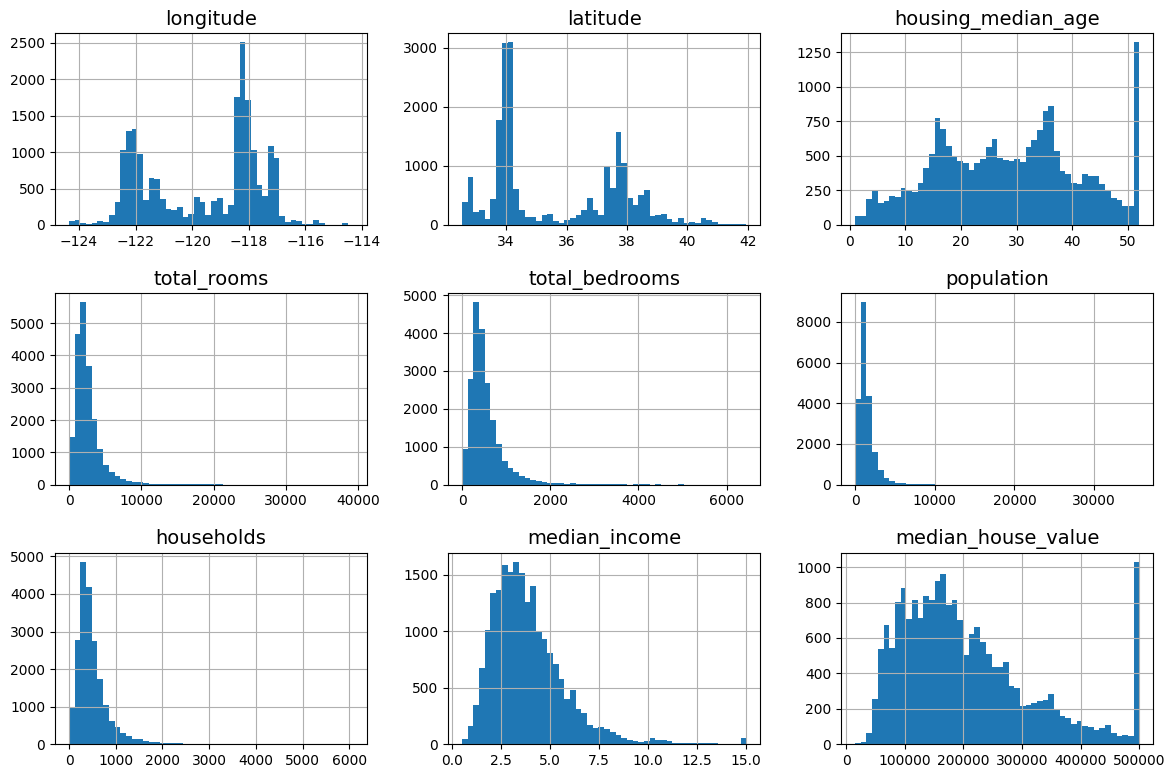

In [10]:
#10)
# using the hist() method to make a histogram about each numerical attribute
import matplotlib.pyplot as plt

# Make it pretty
plt.rc('font', size=14) # rc == "runtime configuration" // is for customizing the graph settings
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8)) # bins=50 means 50 bars in the histogram // figsize=(12, 8) means the figure size of the plot (width, height) in inches
save_fig("attribute_histogram_plots")

plt.show()

# 2.) Create a Test Set

In [11]:
#11) Making a Test Set 
        ## pick 20% of the dataset at random and set it aside as a test set
import numpy as np
from typing import Tuple

def shuffle_and_split_data(data: pd.DataFrame, test_ratio: float) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Shuffle the data and split it into a training and test set using a specified test ratio.
    """
    shuffled_indices: np.ndarray = np.random.permutation(len(data)) 
    test_set_size: int = int(len(data) * test_ratio)
    test_indices: np.ndarray = shuffled_indices[:test_set_size]     # Return first 20%
    train_indices: np.ndarray = shuffled_indices[test_set_size:]    # Return the remaining 80%
    
    train_set: pd.DataFrame = data.iloc[train_indices]  # .iloc == "integer location by index"
    test_set: pd.DataFrame = data.iloc[test_indices]
    
    return train_set, test_set

In [12]:
#12)
# Shuffling and splitting the imported csv file as a pandas DataFrame (which is a table)

train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set))
print(len(test_set))

        # Issues: Every time the fxn is run, it makes a whole different test set
        # Solution?: Save first test set & load later || Used a random seed

# BEST SOLUTION:
        # *** use a Hashing algorithm on each instance's identifier --> 
        # assign to test set if hash(value) % 100 < 20

16512
4128


In [13]:
#13)
# Hashing algorithm implementation

from zlib import crc32                              # zilb = zipping lib // crc32 = cyclic redundancy check (CRC) algorithm
import pandas as pd

def is_id_in_test_set(identifier: int, test_ratio: float) -> bool:
    """
    Returns True if the hash of the identifier is less than the threshold, 
    indicating the instance should be in the test set. Otherwise, returns False.
    """
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data: pd.DataFrame, test_ratio: float, id_column: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Splits the dataset into training and test sets using a hash of the IDs.
    """

    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
#14) No identifier column --> So We should use the row index

housing_with_id = housing.reset_index()     # Adds an 'index' column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

    # Stipulations:
        ## If using the "row_index" as the unique identifier, new data must be appended
        ## to the end of the dataset AND no row can be deleted

In [15]:
#15) Making a unique identifier using the most stable features of the dataset
        ## ** this example will use the latitude & longitude b/c tectonics **

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [16]:
#16) Using sklearn's train_test_split() method
        ## Basically the same thing as the shuffle_and_split_data() method
        ## I created earlier

    # Notes:
    # "random_state" parameter == seed for the random generator
    # Can pass it multiple datasets with an identical number of rows
        ## ^ useful for when you have a separate DataFrame for labels
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
#17) "Stratified Sampling" -> Making sure the test set is proportional to each strata
    # Def: US population has 51.1% women --> a well-conducted survey of 1,000 has 511W & 489M
import pandas as pd

#Steps:
    #1) Most Medium incomes are clustered around 1.5-6.0
    #2) Make an "income category" attribute from the housing dataset
    #3) Use pd.cut() fxn to create an income category attribute with 5 categories
housing["income_cat"]: pd.Series = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

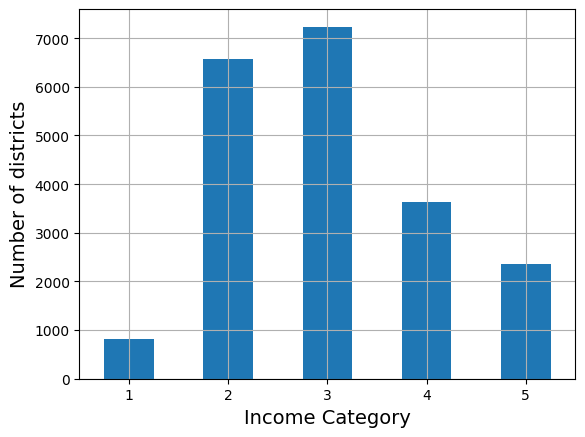

In [18]:
#18) Testing our new income category attribute

# Take the income_cat attribute -> Give a count of each category -> Sort each Sorted Category
# by their index -> Plot the data in a bar graph w/ no tilt & gridlines

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [19]:
#19) Using the "sklearn.model_selection" package to split the data into strata
    # I will be using "split()" methods to split the data & return an iterator over diff train & test splits

    # ** the method ACKCHUALLY yields their INDICES, not the data itself **

# Here is some code that generates 10 different stratified splits:
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List, Tuple

splitter: StratifiedShuffleSplit = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits: List[Tuple[pd.DataFrame, pd.DataFrame]] = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n: pd.DataFrame = housing.iloc[train_index]
    strat_test_set_n: pd.DataFrame = housing.iloc[test_index]
    strat_splits.append((strat_train_set_n, strat_test_set_n)) # Append the train & test sets to the list

In [20]:
#20) Using the first split
strat_train_set, strat_test_set = strat_splits[0]

**And its much shorter to get a single function**

In [21]:
#21) Using a simpler way to get a single split using the "train_test_split()" function w/ the "stratify" argument
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

**Checking to see if it works as expected**

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

# The proportions generated of each income category are almost EXACTLY what the real dataset has
# Meanwhile, a randomly-generated sampling would be skewed

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

**Dropping the income_cat column**

In [23]:
#22) Dropping the column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3.) Explore and Visualize the Data to Gain Insights

1. Put the test set aside (only exploring training set)
2. If training set is large --> sample an *exploration set* to make manipulations easy & fast during *exploration phase*
3. Make a **copy of original dataset** for training // *it is small and this is for practive*

In [24]:
housing = strat_train_set.copy()  # Make a copy of the training set to work with

## 3a) <u>Visualizing Geographic Data</u>
1. Because the dataset includes **geographical information (latitude and longitude)**, it is smart to make a scatterplot of all the districts to visualize the data

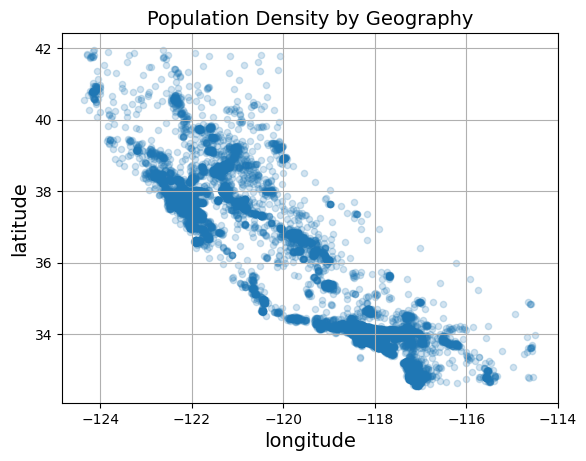

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.title("Population Density by Geography")
plt.show()

# The graph should literally look like the state of California
# Alpha parameter controls the transparency of the points

2. Plotting the **housing prices** next
- *radius* of each circle represents the district's *population* (option **s**)
- *color* of each circle represents the *price* (option **c**)
- This uses a predefined *color map* (option **cmap**) called **jet**
    - ranged from *blue* (low values) to *red* (high values)

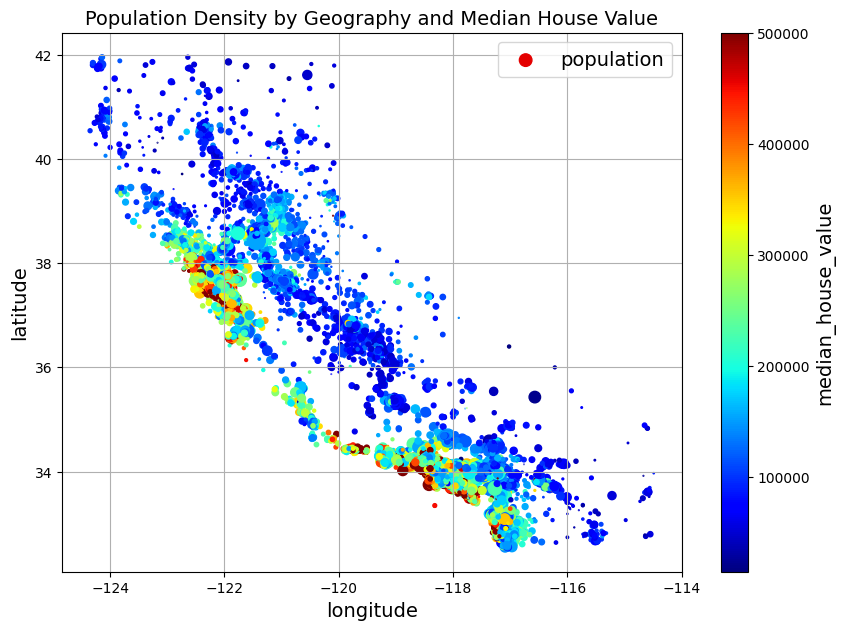

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10,7))
plt.title("Population Density by Geography and Median House Value")
plt.show()

## 3b) <u>Look for Correlations</u>
1. Compute the ***standard correlation coefficient*** (aka *Pearson's r*) between every pair of attributes
    - Done by using the **corr() method**
    - **.corr()** is a ***pandas DataFrame Method***

In [27]:
corr_matrix = housing.corr(numeric_only=True)

2. Check to see how much each *attribute* correlates with the *median house value*

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

3. Using the *Pandas* **scatter_matrix() function**
    - Plots every numerical attribute against every other numerical attribute
        - Would yield 11² == 121 plots, **therefore** we focus on the promising ones from the previously provided matrix

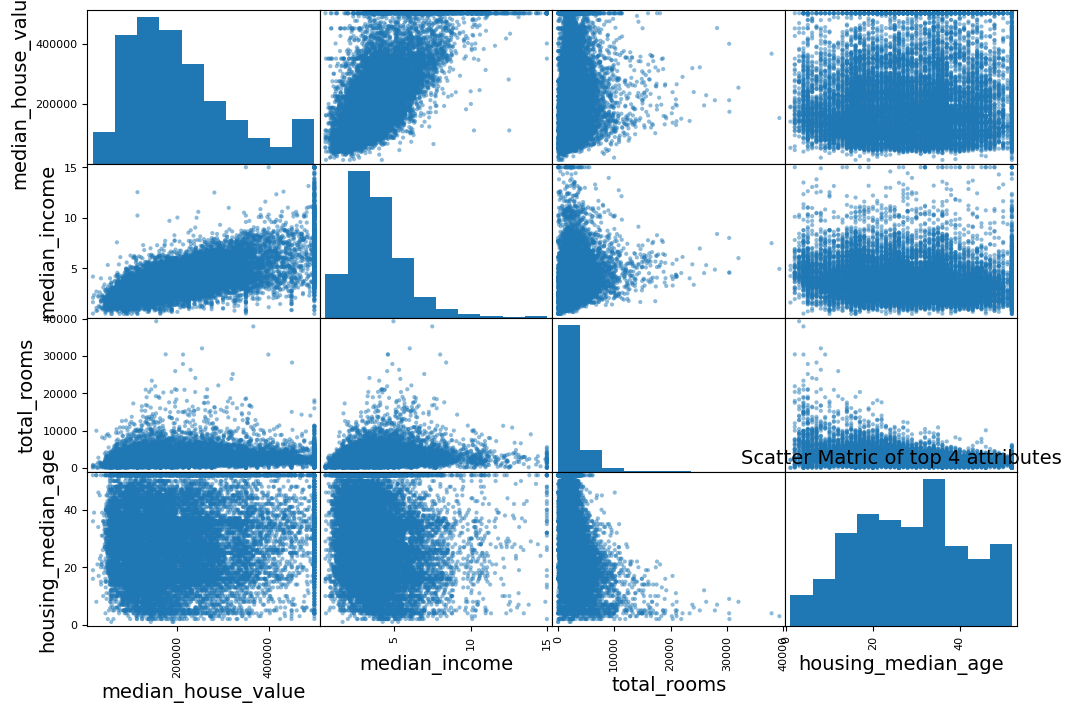

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

plt.title("Scatter Matric of top 4 attributes")
plt.show()
# Main Diagonal = Histogram of frequency of each attribute

4. Most Promising attribute to predict median house value seems to be ***median income***
    - Zoom in on it with its own *super duper special scatterplot*

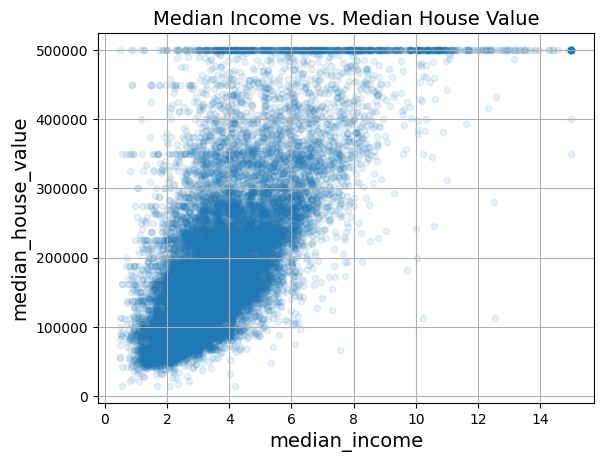

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.title("Median Income vs. Median House Value")
plt.show()

<h2>3c) <u>Experiment with Attribute Combinations</u></h2>

1. Already found a few quirks to clean-up before feeding the dataset to the algorithm
    - **Ex:** *The Horizontal lines @$550k, @$450k, @350k in the Med_income v. Med_house_val graph*
    - Some attributes have a skewed-right distribution, so I may want to **transform them**
        - **Ex:** *computing their logarithm or square-root*

2. One last thing to do is to try out various **attribute cominations**
    - **Ex:** the number of rooms in a district isn't useful if we don't know how many households there are
    - Also going to create:
        - **num of bedrooms vs. num of rooms**
        - **population per-household**

In [31]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [32]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# 4) <u>Preparing the Data for Machine Learning Algorithms</u>
#### 1. Will be done using **functions** for the following reasons:
- Allows me to reproduce these transformations on any dataset
- Adds to my library of transformation functions that can be reused in future projects
- Can use these functions in my **live system** to transform the new data before feeding it to my algorithms
- Makes it possible to easily try various transformations and see which combination of transformations work best

#### 2. Necessary steps to perform first:
- Revert to a clean training set (copy **strat_train_set**)
- Seperate the **predictors** and the **labels**
    - B/C I don;t necessairly want to apply the same transformations to the *predictors* and the *target values*
- The **drop()** function creates a *copy* of the data and does not affect the **strat_train_set**

In [33]:
housing: pd.DataFrame = strat_train_set.drop("median_house_value", axis=1) # axis=1 means
housing_labels: pd.Series = strat_train_set["median_house_value"].copy()

## 4a) <u>Clean the Data</u>
- Most ML-algs cannot work with *missing features* --> Therefore *take care of it*
    - Ex: the *total_bedrooms* attribute is missing some feaures

- How to fix:
    1. Get rid of those Districts
    2. Get rid fo the *whole attribute*
    3. Set the missing values to some value
        - Ex: *zero, the mean, the median, etc...*
        - This is referred to as `inputation`

- Done using the *Pandas Dataframe's* ***dropna(), drop(), and fillna() methods***

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)     # option 1

housing.drop("total_bedrooms", axis=1)                      # option 2

median = housing["total_bedrooms"].median()                 # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```
- I will choose **option 3** because it is the least-destructive

##### Using the *SciKit-Learn class* `SimpleImputer` which holds the following benefits:
1. Stores the **median value** of each feature
2. Makes it possible to **impute** missing values on the:
    - *training set*
    - *validation set*
    - *any new data fed to the model*

- To use:
    1. Create a **SimpleImputer Instance**
    2. Specify that I want to replace *each attribute's missing values* with the `median` of that attribute

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [35]:
housing_num = housing.select_dtypes(include=[np.number])

Fitting the **imputer** instance to the training data using the **fit()** method

In [36]:
imputer.fit(housing_num) # From the sklearn library

SimpleImputer(strategy='median')

- Applying the `imputer` to all numerical attributes
    - cannot be sure that there won't be **missing values** in new data after the system goes live

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [38]:
# Check that this is the same by manually-calculating the median of each attribute
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

- Using the "trained" **imputer** to transform the training set by replacing missing values with the learned-medians

In [39]:
X = imputer.transform(housing_num) # Returns a NumPy array

1. Missing values can also be replaced with the following methods:
    ```python
    imputer = SimpleImputer(strategy="mean")
    imputer = SimpleImputer(strategy="most_frequent")
    imputer = SimpleImputer(strategy="constant", fill_value=...)
    ```

    - The last 2 strategies support *non-numerical data*

2. There are more powerful imputers available in the `sklearn.impute` package:
    1. **KNNImputer**        -> replaces each missing val w/ **µ** of the k-nearest neighbors' values
    2. **IterativeImputer**  -> Trains a regression model per-feature to predict missing values based on all other available features

## <u>Notes on the Scikit-Learn API:</u>
- The main principles of the design are:
1. *Consistency*
    - All objects share a consistent and simple interface

2. *Estimators*
    - Any object that can estimate some parameters based on a dataset is called an `estimator`
        - Ex: **SimpleImputer** is an `estimator`
    - The estimation is performed by the **fit()** method & takes a dataset as a parameter
        - ^^ or **two** for supervised learning algorithms
        - The second Dataset contains `labels`
    - Any other parameter needed to guide the estimation process is considered a `hyperparameter`
        - Ex: **SimpleImputer's `strategy`**
        - Must be set as an *instance variable* (generally via a constructor parameter)

3. *Transformers*
    - `transformer` --> <u>Any method to transform the dataset</u>
    - performed by the **transform()** method w/ the dataset to ***transform as a parameter***
        - also has the **fit_transform()** method which does the same thing as **Object.fit().transform()**, but is faster

4. *Predictors*
    - `predictor` --> <u>Estimators that, given a dataset, are capable of making predictions</u>
        - Ex: the **LinearRegression** model from before (given a GDP per-capita, it predicts life satisfaction)
    - Has a **predict()** method that:
        - Takes a Dataset of new instance
        - Returns a dataset of corresponding predictions
    - Also has a **score()** method that:
        - Masures the quality of the predictions, given a test set
        - ***some also provide methods to measure the `confidence` of their predictions***

5. *Inspection*
    - All the estimator's `parameters` are accessible directly via public instance variables (i.e. **imputer.strategy**)
    - All the estimator's `learned parameters` are accoessible via public instance variables with an underscore suffix (e.g. **imputer.statistics_**)

6. *Nonproliferation of lclasses*
    - Datasets are represented as *NumPy arrays* or *SciPy* sparse matrices (not homemade classes)
    - Hyperparameters are just regular Python strings or numbers

7. *Sensible defaults*
    - Scikit-Learn provides reasonable default values for most parameters
        - ***makes it easy to quickly create a baseline working system***

In [40]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

- Wrapping the output of  ```python imputer.transform(housing_num)``` (which is array **X**) because it is outputted as a *NumPy array* and doesn't have ***column names nor index***

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

## 4b) <u>Handling Text and Categorical Attributes</u>

1. Only one text-attribute in this dataset which is **ocean_proximity**

In [42]:
housing_cat: pd.DataFrame = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


2. Converting these categories into numerical attributes from text by using *Scikit-Learn's* `OrdinalEncoder` class

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded: np.ndarray = ordinal_encoder.fit_transform(housing_cat)

In [44]:
# What the values look like
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

3. Getting a lost of categories using the `categories_` instance variable
    - List containing a 1D array of categories for each categorical attribute

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

4. Performing `one-hot encoding` -> <u>If category is present it gets a **1** (hot), otherwise it gets a **0** (cold)</u>
    - prevents the models from assuming some ***order of magnitude*** among the categories by creating `dummy-attributes`
    - This uses Scikit-Learn's `OneHotEncoder` class to <u>convert categorical values into one-hot vectors</u>

In [46]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

cat_encoder = OneHotEncoder()
housing_cat_1hot: csr_matrix = cat_encoder.fit_transform(housing_cat)

In [47]:
# Output defaults to a SciPy "sparse matrix"
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

5. `sparse matrix` --> <u>A hyper-efficient representation for matrices that contain mostly zeroes</u>
    - *it only stores nonzero values and their positions*
    - can be converted to a (dense) NumPy array by calling the `toarray()` method

In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder` (note: the `sparse` hyperparameter was renamed to `sparse_output` in Scikit-Learn 1.2)

In [49]:
cat_encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to get a dense array
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:8]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

6. Pandas has a function called `get_dummies()` which converts each categorical feature into a one-hot representation w/ 1 binary feature per category

In [51]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


- Once your model is in production, it should be fed **exactly the same features** as during training: no more, no less
    - Look at how the trained `cat_encoder` outputs when using df_test using **transform()** not **fit_transform()**

In [52]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

7. Another issue: `get_dummies()` doesn't generate exceptions for DataFrames with an **unknown** category (ex: "<2H Ocean")
    - Instead, it makes a column for it

In [53]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


8. Using `OneHotEncoder` to detect unknown categories and raise an exception
    - setting the `handle_unknown` hyperparameter to **"ignore"** to represent the unknown category with 0's

In [54]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

9. The `feature_names_in_` attribute -> <u>Where column names "fitted" through a SK-learn Estimator are stored</u>
    - After use --> Scikit ensures that any DataFrame fed to the estimator after (ex: **transform()**) has the same column names
    - Also contains a `get_feature_names_out()` method to **build a DataFrame around the Transformer's output**

In [55]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [56]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [57]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),        # transforms the data by 1hotEncoding
                         columns=cat_encoder.get_feature_names_out(),   # Labels the columns with the feature names
                         index=df_test_unknown.index)                   # Keeps the same index as the input DataFrame

In [58]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## 4c) <u>Feature Scaling and Transformation</u>
- `feature scaling` -> <u>The process of standardizing the weight of your attributes so that models won't ignore the ones with a smaller deviation</u>
    - Ex: *total number of rooms is from 6 to 39,320 || median incomes range from 0 to 15*
    - Without scaling, most models will tend to **ignore median income** and focus more on the **number of rooms**

- Methods being used:
    1. `min-max scaling / normalization`
    2. `standardization`

1. `normalization`
    - values are shifted and rescaled so that they range between 0 and 1
    - Done by subtracting the min value and dividing by the difference between the max and the min
    - Scikit has a *transformer* called `MinMaxScaler`
        - Has a `feature_range` hyperparameter to change it to NOT 0-1
        - Ex: some NN's work from -1 to 1

In [59]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled: np.ndarray = min_max_scaler.fit_transform(housing_num) # housing_num == The housing numerical data only

2. **standardization** subtracts the **mean** value, THEN divides by the **standard deviation** (so the standardized values have a σ of '1')
    - No specific range-restrictions
    - Much less affected by outliers
        - Ex: accidental 100 on a scale of 1-15 --> min-max makes this a '1' and all others '0-0.15'
    - has a transformer called `StandardScaler` for standardization

- **TIP**
    - Scaling a *sparse matrix* w/o converting it to a *dense matrix* first? ...
    - use a `StandardScaler` with its `with_mean` hyperparameter set to `False`
        - Divides the data by the σ w/o subtracting the µ

In [60]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scale = std_scaler.fit_transform(housing_num)

3. Accounting for a **heavy tail** (values far from the mean aren't rare)
    - minmax & standardize are great for this
    - as is replacing the feature with its **sqrt**
    - Should use logarithms in a `power law distribution` --> The Few have MANY, and many have FEW ($$ irl)
    - Demoing on the **population** feature

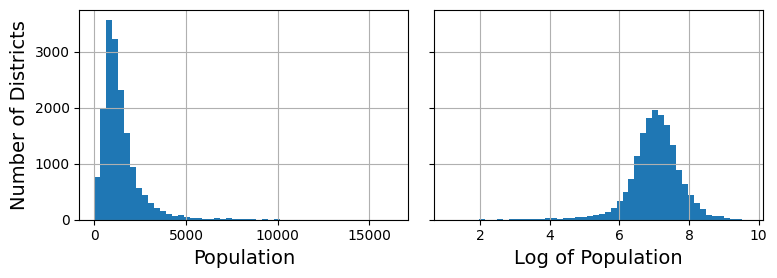

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of Population")
axs[0].set_ylabel("Number of Districts")
save_fig("long_tail_plot")
plt.show()

What if we replaced each value with its percentile?

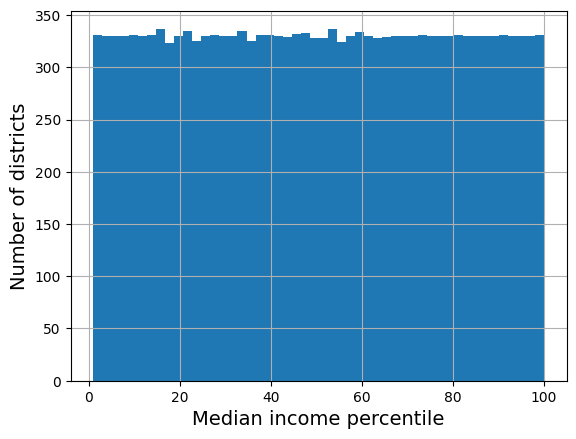

In [62]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)] # Calc the vals of each percentile

flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1)) # Create bins for each percentile

flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

4. **Bucketizing features**
    - `bucketization` --> <u>Chopping the distribution into *roughly* equal-sized buckets, and replacing each feature value with the index of the bucket it belongs to</u>
        - ex: replacing each value with its percentile
        - Results in an *almost uniform distribution* with equal-sized buckets
    - `multimodal distribution` --> <u>The feature has 2 or more **peaks** (aka `modes`)</u> 
        - Can also be helpful to *bucketize*
        - Treat bucket ID's as categories rather than #'s
            - Ex: with **OneHotEncoder**
    - Adding a feature to each (main) **Mode** in a **multimodal distribution** that represents the similarity between `housing_median_age` and `other_feature`
        - Computed using a `radial basis function (RBF)` --> <u>Any function that depends only on the distance between the **input value** and a **fixed point**</u>
        - Ex: Gaussian RBF between housing age x & 35 == exp(-Γ(x-35)²)
            - hyperparameter Γ(gamma) determines how quickly the *similarity measure* decays as *x* moves away from 35
        - Done using Scikit's `rbf_kernel()` function

In [63]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35: np.ndarray = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

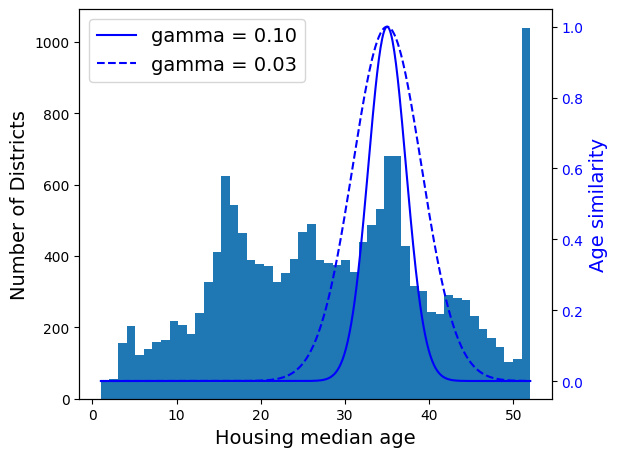

In [64]:
# Showing the chart that visualizes different Gammas

ages: np.ndarray = np.linspace(housing["housing_median_age"].min(), #start age
                   housing["housing_median_age"].max(), #end age
                   500).reshape(-1, 1) # 500 points

gamma1: float = 0.1
gamma2: float = 0.03
rbf1: np.ndarray = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2: np.ndarray = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of Districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

## ** If this age group is CORRELATED with lower prices, this can be a BIG help **

5. The `Inverse_transform()` method
    - Reverts features back to their **original values** (useful for undoing a OneHotEncoder for example)
    - This example shows ow to scale the labels using a `StandardScaler` which expects 2D outputs

In [65]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels: np.ndarray = target_scaler.fit_transform(housing_labels.to_frame()) # Converts the pandas Series (1D array w/ index{labels}) to a 2D array (DataFrame)

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

some_new_data: pd.DataFrame = housing[["median_income"]].iloc[:5]  # Pretend this is new data

scaled_predictions: np.ndarray = model.predict(some_new_data) 
predictions: np.ndarray = target_scaler.inverse_transform(scaled_predictions)  # Inverse transform to get back to original scale

In [66]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])